<a href="https://colab.research.google.com/github/DonaldTurton/AT2_Advanced_Data_Algorithms/blob/master/EDA_EnergyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

#Libraries 

In [0]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Correlation plot
from google.colab import files

# Get Data

In [94]:
url = 'https://raw.githubusercontent.com/DonaldTurton/AT2_Advanced_Data_Algorithms/master/adaa_data.csv'
data = pd.read_csv(url)
data.head()

,Year.x,Month,Day,TOTALDEMAND,RRP,date_keep,time_keep,Daily.global.solar.exposure..MJ.m.m.,Minimum.temperature..Degree.C.,Maximum.temperature..Degree.C.,Rainfall.amount..millimetres.,Season,price_mov_avg_1hr,price_mov_avg_2hr,demand_mov_avg_1hr,demand_mov_avg_2hr,segment_day,week_of_year,day_of_week,segment_30min,index
0,2018,1,1,6912.25,91.86,2018/01/01,00:30:00,31.0,20.8,28.3,0.0,1,0.000,0.0000,0.000,0.000,1,1,Monday,2,1
1,2018,1,1,6745.63,88.83,2018/01/01,01:00:00,31.0,20.8,28.3,0.0,1,NaN,0.0000,NaN,0.000,1,1,Monday,3,2
2,2018,1,1,6466.06,73.62,2018/01/01,01:30:00,31.0,20.8,28.3,0.0,1,90.345,0.0000,6828.940,0.000,1,1,Monday,4,3
3,2018,1,1,6279.80,71.49,2018/01/01,02:00:00,31.0,20.8,28.3,0.0,1,81.225,81.4500,6605.845,6600.935,1,1,Monday,5,4
4,2018,1,1,6177.31,69.27,2018/01/01,02:30:00,31.0,20.8,28.3,0.0,1,72.555,75.8025,6372.930,6417.200,1,1,Monday,6,5


# Data Exploration


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 21 columns):
Year.x                                  28080 non-null int64
Month                                   28080 non-null int64
Day                                     28080 non-null int64
TOTALDEMAND                             28080 non-null float64
RRP                                     28080 non-null float64
date_keep                               28080 non-null object
time_keep                               28080 non-null object
Daily.global.solar.exposure..MJ.m.m.    28080 non-null float64
Minimum.temperature..Degree.C.          28080 non-null float64
Maximum.temperature..Degree.C.          28080 non-null float64
Rainfall.amount..millimetres.           28080 non-null float64
Season                                  28080 non-null int64
price_mov_avg_1hr                       28079 non-null float64
price_mov_avg_2hr                       28080 non-null float64
demand_mov_avg_1hr 

In [96]:
data.describe()

,Year.x,Month,Day,TOTALDEMAND,RRP,Daily.global.solar.exposure..MJ.m.m.,Minimum.temperature..Degree.C.,Maximum.temperature..Degree.C.,Rainfall.amount..millimetres.,Season,price_mov_avg_1hr,price_mov_avg_2hr,demand_mov_avg_1hr,demand_mov_avg_2hr,segment_day,week_of_year,segment_30min,index
count,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000,28079.000000,28080.000000,28079.000000,28080.000000,28080.000000,28080.000000,28080.000000,28080.000000
mean,2018.376104,5.637856,15.545584,8081.244216,84.282953,16.133415,14.858526,23.990242,2.190085,2.331695,84.277452,84.271783,8081.003649,8080.485022,2.458333,22.643839,24.500000,14040.500000
std,0.484415,3.223593,8.825677,1236.557902,58.744794,6.895621,5.044146,5.425505,6.981044,1.020859,51.098684,44.997070,1222.512947,1212.795148,1.153969,14.001739,13.853646,8106.142116
min,2018.000000,1.000000,1.000000,5552.230000,2.980000,1.700000,4.200000,13.800000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2018.000000,3.000000,8.000000,7187.257500,62.300000,11.100000,10.400000,19.800000,0.000000,1.000000,62.460000,62.725000,7196.875000,7205.216875,1.000000,11.000000,12.750000,7020.750000
50%,2018.000000,5.000000,15.000000,7996.010000,74.920000,14.400000,15.300000,23.400000,0.000000,2.000000,75.465000,76.061250,7997.705000,7996.440000,3.000000,21.000000,24.500000,14040.500000
75%,2019.000000,8.000000,23.000000,8789.700000,94.802500,20.700000,19.200000,27.900000,0.400000,3.000000,95.032500,95.370000,8786.410000,8779.598750,3.000000,32.000000,36.250000,21060.250000
max,2019.000000,12.000000,31.000000,13700.900000,4631.980000,32.100000,23.800000,43.700000,56.600000,4.000000,3478.520000,2372.550000,13669.780000,13583.927500,4.000000,52.000000,48.000000,28080.000000


In [97]:
#Find Null values 
data.isnull().sum()

Year.x                                  0
Month                                   0
Day                                     0
TOTALDEMAND                             0
RRP                                     0
date_keep                               0
time_keep                               0
Daily.global.solar.exposure..MJ.m.m.    0
Minimum.temperature..Degree.C.          0
Maximum.temperature..Degree.C.          0
Rainfall.amount..millimetres.           0
Season                                  0
price_mov_avg_1hr                       1
price_mov_avg_2hr                       0
demand_mov_avg_1hr                      1
demand_mov_avg_2hr                      0
segment_day                             0
week_of_year                            0
day_of_week                             0
segment_30min                           0
index                                   0
dtype: int64

# Y Variable Exploration

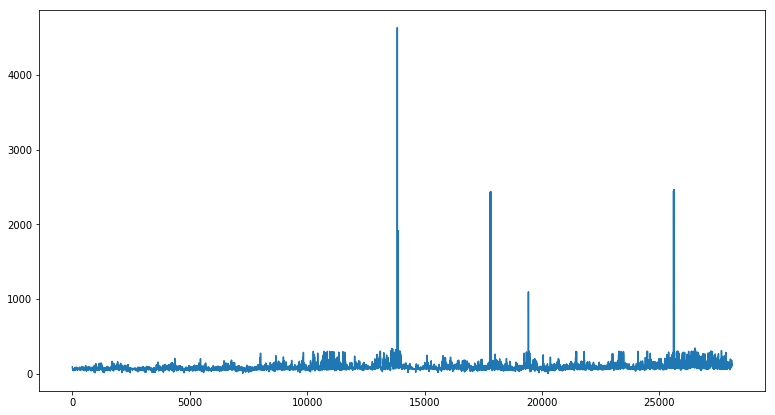

In [98]:
#Plot trend
Price = data["RRP"].values
plt.figure(figsize=(13,7))
plt.plot(Price)
plt.show()

In [99]:
data.RRP.describe() # Presence of extreme outliers  

count    28080.000000
mean        84.282953
std         58.744794
min          2.980000
25%         62.300000
50%         74.920000
75%         94.802500
max       4631.980000
Name: RRP, dtype: float64

# Data Manipulation

In [100]:
# Replace outliers with median 

median = float(data['RRP'].median())
data["RRP"] = np.where(data["RRP"] > 900, median, data['RRP'])

data.RRP.describe()

count    28080.000000
mean        83.438984
std         34.911865
min          2.980000
25%         62.300000
50%         74.920000
75%         94.780000
max        344.610000
Name: RRP, dtype: float64

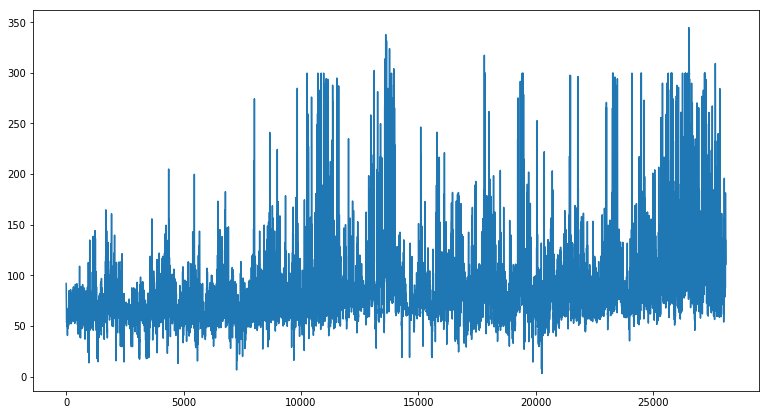

In [101]:
# Price 
Price = data["RRP"].values
plt.figure(figsize=(13,7))
plt.plot(Price)
plt.show()

In [102]:
# LAG Total Demand by 30 mins 
data['TOTALDEMAND'] = data['TOTALDEMAND'].shift(1)
data.head()

,Year.x,Month,Day,TOTALDEMAND,RRP,date_keep,time_keep,Daily.global.solar.exposure..MJ.m.m.,Minimum.temperature..Degree.C.,Maximum.temperature..Degree.C.,Rainfall.amount..millimetres.,Season,price_mov_avg_1hr,price_mov_avg_2hr,demand_mov_avg_1hr,demand_mov_avg_2hr,segment_day,week_of_year,day_of_week,segment_30min,index
0,2018,1,1,NaN,91.86,2018/01/01,00:30:00,31.0,20.8,28.3,0.0,1,0.000,0.0000,0.000,0.000,1,1,Monday,2,1
1,2018,1,1,6912.25,88.83,2018/01/01,01:00:00,31.0,20.8,28.3,0.0,1,NaN,0.0000,NaN,0.000,1,1,Monday,3,2
2,2018,1,1,6745.63,73.62,2018/01/01,01:30:00,31.0,20.8,28.3,0.0,1,90.345,0.0000,6828.940,0.000,1,1,Monday,4,3
3,2018,1,1,6466.06,71.49,2018/01/01,02:00:00,31.0,20.8,28.3,0.0,1,81.225,81.4500,6605.845,6600.935,1,1,Monday,5,4
4,2018,1,1,6279.80,69.27,2018/01/01,02:30:00,31.0,20.8,28.3,0.0,1,72.555,75.8025,6372.930,6417.200,1,1,Monday,6,5


In [103]:
# Update the moving average variables

data.demand_mov_avg_1hr = data.TOTALDEMAND.rolling(window=2).mean()
data.demand_mov_avg_2hr = data.TOTALDEMAND.rolling(window=4).mean()

data.head()

# Create a new price variable with one unit lag (predicting current price will be influenced by the previous periods price)

data['lagprice'] = data.RRP.shift(1)

data.head()

# Create moving average variables for 1hr and 2hrs in python

data.price_mov_avg_1hr = data.lagprice.rolling(window=2).mean()
data.price_mov_avg_2hr = data.lagprice.rolling(window=4).mean()

data.head()

,Year.x,Month,Day,TOTALDEMAND,RRP,date_keep,time_keep,Daily.global.solar.exposure..MJ.m.m.,Minimum.temperature..Degree.C.,Maximum.temperature..Degree.C.,Rainfall.amount..millimetres.,Season,price_mov_avg_1hr,price_mov_avg_2hr,demand_mov_avg_1hr,demand_mov_avg_2hr,segment_day,week_of_year,day_of_week,segment_30min,index,lagprice
0,2018,1,1,NaN,91.86,2018/01/01,00:30:00,31.0,20.8,28.3,0.0,1,NaN,NaN,NaN,NaN,1,1,Monday,2,1,NaN
1,2018,1,1,6912.25,88.83,2018/01/01,01:00:00,31.0,20.8,28.3,0.0,1,NaN,NaN,NaN,NaN,1,1,Monday,3,2,91.86
2,2018,1,1,6745.63,73.62,2018/01/01,01:30:00,31.0,20.8,28.3,0.0,1,90.345,NaN,6828.940,NaN,1,1,Monday,4,3,88.83
3,2018,1,1,6466.06,71.49,2018/01/01,02:00:00,31.0,20.8,28.3,0.0,1,81.225,NaN,6605.845,NaN,1,1,Monday,5,4,73.62
4,2018,1,1,6279.80,69.27,2018/01/01,02:30:00,31.0,20.8,28.3,0.0,1,72.555,81.45,6372.930,6600.935,1,1,Monday,6,5,71.49


In [0]:
# EXPORT THE DATA WITH NO OUTILERS
#from google.colab import files
#data.to_csv('Clean_Data.csv') 
#files.download('Clean_Data.csv')

# Highest Correleated Variables 

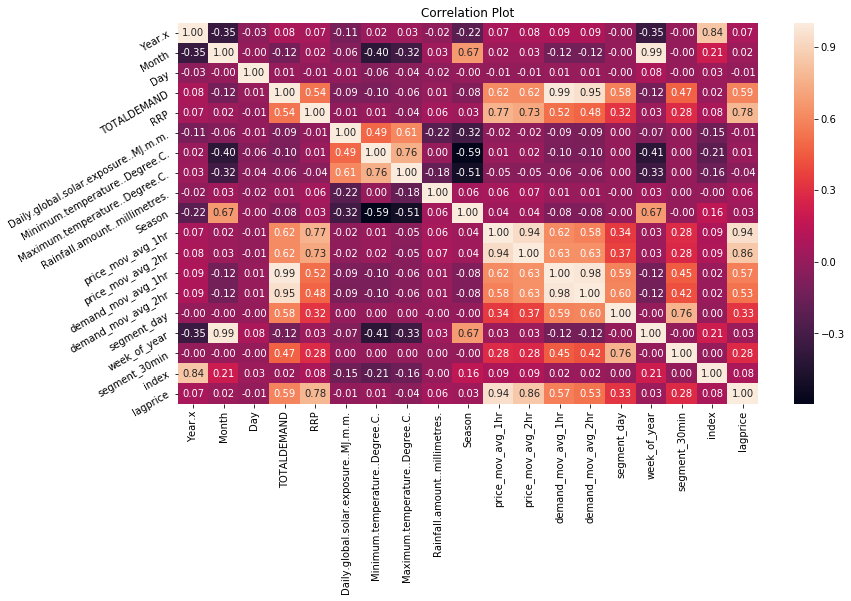

In [104]:
corr = data.corr()
plt.figure(figsize=(13,7))
plt.title('Correlation Plot')
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90) 
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30) 
plt.show()

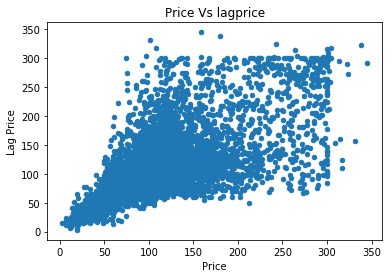

In [107]:
# lagprice
data.plot("RRP", "lagprice", kind="scatter")
plt.title('Price Vs lagprice')
plt.xlabel('Price')
plt.ylabel('Lag Price')
plt.show()

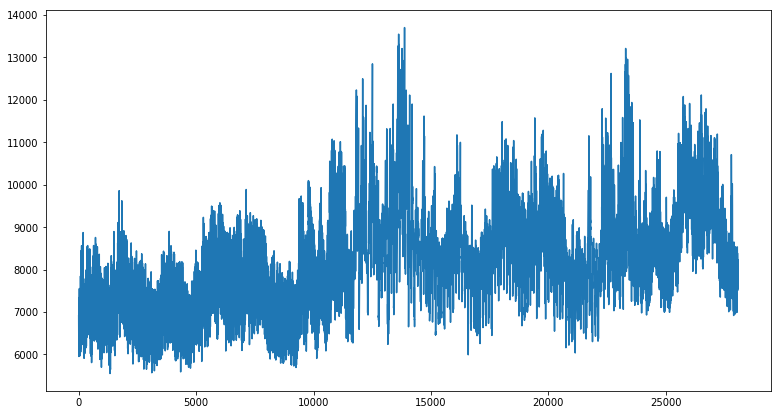

In [71]:
# Demand
Price = data["TOTALDEMAND"].values
plt.figure(figsize=(13,7))
plt.plot(Price)
plt.show()

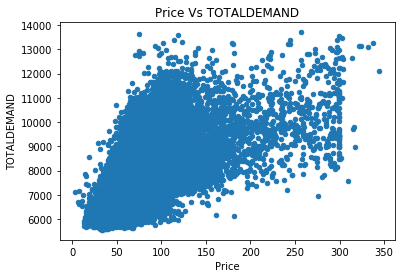

In [90]:
data.plot("RRP", "TOTALDEMAND", kind="scatter")
plt.title('Price Vs TOTALDEMAND')
plt.xlabel('Price')
plt.ylabel('TOTALDEMAND')
plt.show()

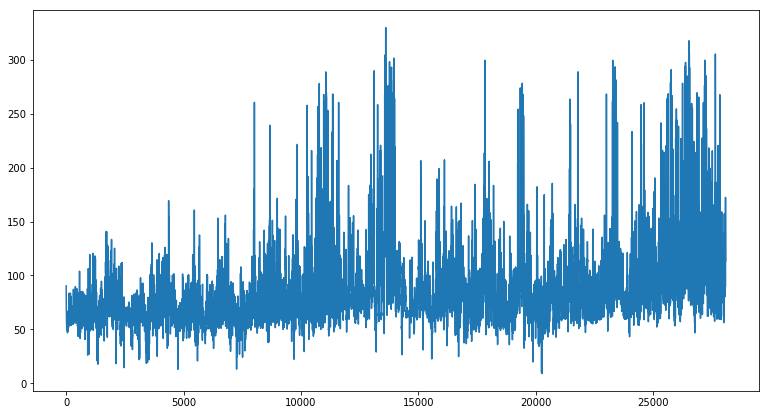

In [0]:
#Moving Avarage
Price = data["price_mov_avg_1hr"].values
plt.figure(figsize=(13,7))
plt.plot(Price)
plt.show()

# Price By Day of The Week

In [108]:
Days = data.loc[:,["RRP", "day_of_week"]]
Days.head()

,RRP,day_of_week
0,91.86,Monday
1,88.83,Monday
2,73.62,Monday
3,71.49,Monday
4,69.27,Monday


In [0]:
#Days.day_of_week = Days.day_of_week.astype('category')

In [109]:
Days['day_of_week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [110]:
Days.groupby("day_of_week").describe()


RRP                        ...                         
              count       mean        std  ...    50%       75%     max
day_of_week                                ...                         
Friday       3985.0  87.164587  36.070937  ...  80.07   97.1900  331.58
Monday       4031.0  84.221278  35.272261  ...  75.86   95.4000  303.96
Saturday     3984.0  77.082146  25.750350  ...  70.47   88.1800  299.60
Sunday       3984.0  72.940628  27.794134  ...  65.07   82.7300  299.60
Thursday     4032.0  87.750868  36.992757  ...  79.63   98.3175  317.28
Tuesday      4032.0  86.714777  38.761274  ...  77.09   97.2925  344.61
Wednesday    4032.0  88.041570  38.173997  ...  78.18  100.0100  337.72

[7 rows x 8 columns]

In [0]:
indices = Days['day_of_week'] == 'Monday'
Monday = Days.loc[indices,:] # extract new DataFrame

indices = Days['day_of_week'] == 'Tuesday'
Tuesday = Days.loc[indices,:]

indices = Days['day_of_week'] == 'Wednesday'
Wednesday = Days.loc[indices,:]

indices = Days['day_of_week'] == 'Thursday'
Thursday = Days.loc[indices,:]

indices = Days['day_of_week'] == 'Friday'
Friday = Days.loc[indices,:]

indices = Days['day_of_week'] == 'Saturday'
Saturday = Days.loc[indices,:]

indices = Days['day_of_week'] == 'Sunday'
Sunday = Days.loc[indices,:]

               RRP
count  4031.000000
mean     84.221278
std      35.272261
min      17.140000
25%      62.655000
50%      75.860000
75%      95.400000
max     303.960000


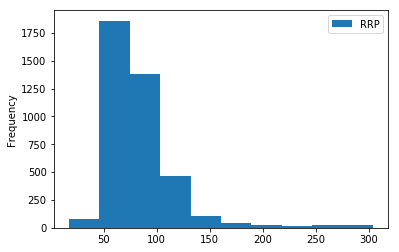

In [0]:
# Monday
describe_Monday = Monday.describe()
print(describe_Monday)
Monday.plot(kind= 'hist')
plt.show()

               RRP
count  4032.000000
mean     86.705461
std      38.764861
min      14.460000
25%      63.130000
50%      77.090000
75%      97.292500
max     344.610000


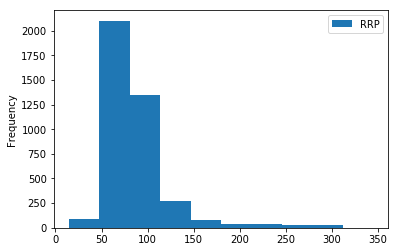

In [0]:
# Tuesday
describe_Tuesday = Tuesday.describe()
print(describe_Tuesday)
Tuesday.plot(kind= 'hist')   #THE OUTLIER IS ON TUESDAY
plt.show()

               RRP
count  4032.000000
mean     88.041570
std      38.173997
min      14.630000
25%      64.297500
50%      78.180000
75%     100.010000
max     337.720000


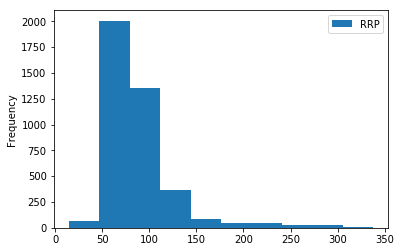

In [0]:
# Wednesday
describe_Wednesday = Wednesday.describe()
print(describe_Wednesday)
Wednesday.plot(kind= 'hist' )   #THE OUTLIER IS ON TUESDAY
plt.show()

               RRP
count  4032.000000
mean     87.746210
std      36.994767
min      20.110000
25%      64.330000
50%      79.630000
75%      98.317500
max     317.280000


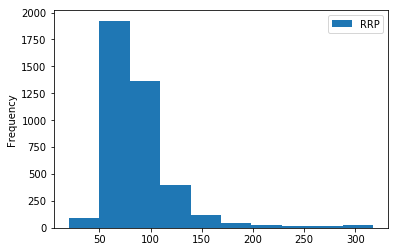

In [0]:
# Thursday
describe_Thursday = Thursday.describe()
print(describe_Thursday)
Thursday.plot(kind= 'hist' )   #THE OUTLIER IS ON TUESDAY
plt.show()

               RRP
count  3985.000000
mean     87.163016
std      36.071606
min      12.930000
25%      64.950000
50%      80.070000
75%      97.190000
max     331.580000


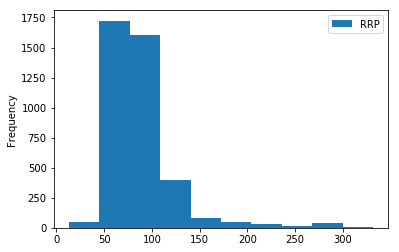

In [0]:
# Thursday
describe_Friday = Friday.describe()
print(describe_Friday)
Friday.plot(kind= 'hist' )   #THE OUTLIER IS ON TUESDAY
plt.show()

# Demand By Day of the week

In [0]:
Demand_Days = data.loc[:,["TOTALDEMAND", "day_of_week"]]
Demand_Days.head()

,TOTALDEMAND,day_of_week
0,NaN,Monday
1,6912.25,Monday
2,6745.63,Monday
3,6466.06,Monday
4,6279.80,Monday


In [0]:
Demand_Days.groupby("day_of_week").describe()

TOTALDEMAND               ...                     
                  count         mean  ...        75%       max
day_of_week                           ...                     
Friday           3985.0  8245.312728  ...  8902.6400  13364.15
Monday           4030.0  8144.592672  ...  8947.4275  12494.58
Saturday         3984.0  7771.115655  ...  8441.5100  13120.67
Sunday           3984.0  7539.531431  ...  8205.1900  12230.57
Thursday         4032.0  8279.551166  ...  8951.8675  13700.90
Tuesday          4032.0  8315.653053  ...  9029.0700  12972.76
Wednesday        4032.0  8264.878988  ...  8878.7525  13270.16

[7 rows x 8 columns]